
whole_genome_sequencing samples count = 40
applied_reference_genome samples count = 11
in table maize_benchmark_test_fix_mkrs_919_01_haplotypes_info_view there are total of 31M haplotype markers 10M of them are unmapped


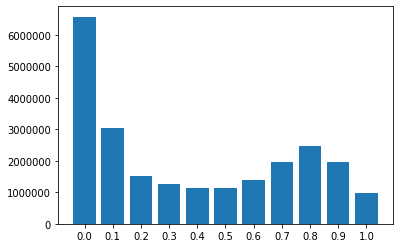

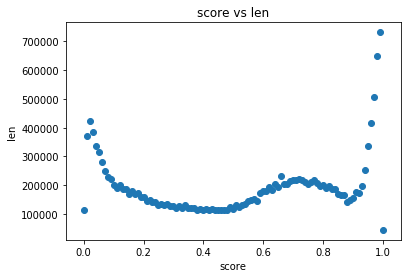

In [1]:
%matplotlib inline
import sys
import os
#data_version=os.getenv("DATA_VERSION")
#assert data_version is not None, "env variable DATA_VERSION is not defined"
data_version='maize_benchmark_test_fix_mkrs_919_01'
genomagic_qa_repo_path = '/home/ariel/clients/genomagic_qa'
sys.path.append(genomagic_qa_repo_path)
import redshift.redshift_queries as rs

host='rndlab-genomagic-redshift.cl6ox83ermwm.us-east-1.redshift.amazonaws.com'
print(rs.get_samples_type_info_as_string(host, data_version))
print(rs.get_hap_count_total_hap_markers_as_string(host, data_version))
rs.hist_count(host, data_version)
rs.hist_count2(host, data_version)